# Bibliotecas

In [1]:

import pandas as pd 
import numpy as np 

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

from ipywidgets import interact
from pandas.api.types import CategoricalDtype

import random

# Parametros do sistema

## 1-) Criando a base de imoveis

In [2]:
#Lendo a base de imoveis
zap = pd.read_csv('zap_residencial_Comprar.csv')  
zap.head()

,Unnamed: 0,_id,TipoUnidade,Valor,Vagas,Suites,Banheiros,Quartos,ValorCondominio,Latitude,Longitude,AreaUtil,AreaExt_comum,ZeroCondominio,ZeroAreaExt
0,1,2479878489,APARTMENT,850000.0,3,1,3,3,905.0,-23.560303,-46.572762,104.0,71.0,0,0
1,8,2306105477,APARTMENT,889000.0,2,3,4,3,1500.0,-23.532511,-46.569246,135.0,0.0,0,1
2,9,2500825587,HOME,350000.0,2,1,2,3,0.0,-23.553276,-46.581519,100.0,100.0,1,0
3,11,2498393879,APARTMENT,295000.0,0,1,1,2,1.0,-23.573155,-46.560051,44.0,0.0,0,1
4,12,2495943026,HOME,2590000.0,0,3,9,4,0.0,-23.552013,-46.582643,350.0,0.0,1,1


In [3]:
#dropando colunas desnecessarias para exercicio 
imoveis_features = zap.drop(['Unnamed: 0','_id','Latitude','Longitude','ZeroCondominio','ZeroAreaExt'],axis='columns')
imoveis_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96205 entries, 0 to 96204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TipoUnidade      96205 non-null  object 
 1   Valor            96205 non-null  float64
 2   Vagas            96205 non-null  int64  
 3   Suites           96205 non-null  int64  
 4   Banheiros        96205 non-null  int64  
 5   Quartos          96205 non-null  int64  
 6   ValorCondominio  96205 non-null  float64
 7   AreaUtil         96205 non-null  float64
 8   AreaExt_comum    96205 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 6.6+ MB


In [4]:
#Temos 9 atributos para serem avaliados, dos quais um éTipo_unidade
N_atrib =9

In [5]:
#Estou salvando as colunas aqui para mostrar no app,mas por dentro, usamos outro modo
colunas_originais= imoveis_features.columns
colunas_originais

Index(['TipoUnidade', 'Valor', 'Vagas', 'Suites', 'Banheiros', 'Quartos',
       'ValorCondominio', 'AreaUtil', 'AreaExt_comum'],
      dtype='object')

In [6]:
#Transformando o atrib_0 em numeros discretos
tipoUnidade_categorias=[]
count =0
for i in np.unique(imoveis_features['TipoUnidade']):
    tipoUnidade_categorias.append(i)
    imoveis_features['TipoUnidade']=imoveis_features['TipoUnidade'].replace(to_replace=i,value=str(count))
    count = count +1
   
imoveis_features['TipoUnidade'] =imoveis_features['TipoUnidade'].astype('int64')
print(tipoUnidade_categorias)
print(imoveis_features.info())

['APARTMENT', 'CONDOMINIUM', 'FLAT', 'HOME', 'KITNET', 'LOFT', 'PENTHOUSE', 'TWO_STORY_HOUSE', 'VILLAGE_HOUSE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96205 entries, 0 to 96204
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TipoUnidade      96205 non-null  int64  
 1   Valor            96205 non-null  float64
 2   Vagas            96205 non-null  int64  
 3   Suites           96205 non-null  int64  
 4   Banheiros        96205 non-null  int64  
 5   Quartos          96205 non-null  int64  
 6   ValorCondominio  96205 non-null  float64
 7   AreaUtil         96205 non-null  float64
 8   AreaExt_comum    96205 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 6.6 MB
None


In [7]:
#Para funcionar o codigo, tenho de renomear as colunas

imoveis_features.columns= ['atrib_' +str(col)  for col in range(0,N_atrib)]
imoveis_features.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,850000.0,3,1,3,3,905.0,104.0,71.0
1,0,889000.0,2,3,4,3,1500.0,135.0,0.0
2,3,350000.0,2,1,2,3,0.0,100.0,100.0
3,0,295000.0,0,1,1,2,1.0,44.0,0.0
4,3,2590000.0,0,3,9,4,0.0,350.0,0.0


In [8]:
imoveis_features.describe()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
count,96205.000000,9.620500e+04,96205.000000,96205.000000,96205.000000,96205.000000,96205.000000,96205.000000,96205.000000
mean,0.801320,1.013942e+06,1.726563,1.082293,2.319755,2.451328,832.265163,112.701772,9.298041
std,1.631708,9.368713e+05,1.132601,1.056054,1.361699,0.888037,876.344421,81.070007,27.538842
min,0.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.200000e+05,1.000000,0.000000,1.000000,2.000000,1.000000,59.000000,0.000000
50%,0.000000,6.717000e+05,1.000000,1.000000,2.000000,3.000000,649.000000,85.000000,0.000000
75%,0.000000,1.250000e+06,2.000000,1.000000,3.000000,3.000000,1195.000000,144.000000,0.000000
max,8.000000,6.000000e+06,8.000000,5.000000,10.000000,5.000000,6000.000000,600.000000,200.000000


In [90]:
#Temos 4 variaveis continuas e precisamos 1-) MinMaxScaler 2-)Bucketiza-las para rodar modelo Binomial
#1-) MinMaxScaler
scaler1 = MinMaxScaler()
price_fit_1 = scaler1.fit(imoveis_features['atrib_1'].to_numpy().reshape(-1, 1))
scaler2 = MinMaxScaler()
valorCondo_fit_6 = scaler2.fit(imoveis_features['atrib_6'].to_numpy().reshape(-1, 1))
scaler3 = MinMaxScaler()
areaUtil_fit_7 = scaler3.fit(imoveis_features['atrib_7'].to_numpy().reshape(-1, 1))
scaler4 = MinMaxScaler()
areaExt_fit_8 = scaler4.fit(imoveis_features['atrib_8'].to_numpy().reshape(-1, 1))


############################################
#2-)Bucketizando...
#a-) definindo numero de Buckets
n_Buckets_price =10
n_Buckets_Condominio = 10
n_Buckets_areaUtil=10
n_Buckets_areaExt=10

################################################
#b-) pre definindo os buckets
#define the bins para price
price_range_bins=list(range(0,n_Buckets_price))
price_range_bins_list = [x / 10 for x in price_range_bins]

#define the label for each bin. Num labels = Num bins - 1
price_range_labels=list(range(1,n_Buckets_price))

#Printandocomo exemplo
print(price_range_bins_list)
print(price_range_labels)

#define the bins para condominio
Condominio_range_bins=list(range(0,n_Buckets_Condominio))
Condominio_range_bins_list = [x / 10 for x in Condominio_range_bins]

#define the label for each bin. Num labels = Num bins - 1
Condominio_range_labels=list(range(1,n_Buckets_Condominio))

#define the bins para Area Util
areaUtil_range_bins=list(range(0,n_Buckets_areaUtil))
areaUtil_range_bins_list = [x / 10 for x in areaUtil_range_bins]

#define the label for each bin. Num labels = Num bins - 1
areaUtil_range_labels=list(range(1,n_Buckets_areaUtil))

#define the bins para Area Ext
areaExt_range_bins=list(range(0,n_Buckets_areaExt))
areaExt_range_bins_list = [x / 10 for x in areaExt_range_bins]

#define the label for each bin. Num labels = Num bins - 1
areaExt_range_labels=list(range(1,n_Buckets_areaExt))

###################################################



[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [91]:
price_range_labels = [x-1 for x in price_range_labels]
price_range_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [92]:
Condominio_range_labels = [x-1 for x in Condominio_range_labels]
areaUtil_range_labels = [x-1 for x in areaUtil_range_labels]
areaExt_range_labels = [x-1 for x in areaExt_range_labels]

In [93]:
#copiandoo df de imoveis sem altera-lo
x=imoveis_features.copy(deep=True)
x.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,850000.0,3,1,3,3,905.0,104.0,71.0
1,0,889000.0,2,3,4,3,1500.0,135.0,0.0
2,3,350000.0,2,1,2,3,0.0,100.0,100.0
3,0,295000.0,0,1,1,2,1.0,44.0,0.0
4,3,2590000.0,0,3,9,4,0.0,350.0,0.0


In [94]:
#continunando...
#C-) bucketizando com pd_cut as variaveis continuas

#Aplicando MinMaxScaler

#Vamosaplicar oscaler na columa de preços
x['atrib_1']= price_fit_1.transform(imoveis_features['atrib_1'].to_numpy().reshape(-1, 1)) 

#Vamosaplicar oscaler na columa de Condomonio
x['atrib_6']= valorCondo_fit_6.transform(imoveis_features['atrib_6'].to_numpy().reshape(-1, 1)) 

#Vamosaplicar oscaler na columa de AreaUtil
x['atrib_7']=areaUtil_fit_7.transform(imoveis_features['atrib_7'].to_numpy().reshape(-1, 1)) 

#Vamosaplicar oscaler na columa de AreaExt
x['atrib_8']=areaExt_fit_8.transform(imoveis_features['atrib_8'].to_numpy().reshape(-1, 1)) 

x.head()


,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,0.139515,3,1,3,3,0.150833,0.173333,0.355
1,0,0.146032,2,3,4,3,0.250000,0.225000,0.000
2,3,0.055973,2,1,2,3,0.000000,0.166667,0.500
3,0,0.046784,0,1,1,2,0.000167,0.073333,0.000
4,3,0.430242,0,3,9,4,0.000000,0.583333,0.000


In [95]:
####################################
#Bucketizando
#Para bucketizar usando pd.cut:
x['atrib_1']=pd.cut(x['atrib_1'],price_range_bins_list,labels=price_range_labels)
x['atrib_6']=pd.cut(x['atrib_6'],Condominio_range_bins_list,labels=Condominio_range_labels)
x['atrib_7']=pd.cut(x['atrib_7'],areaUtil_range_bins_list,labels=areaUtil_range_labels)
x['atrib_8']=pd.cut(x['atrib_8'],areaExt_range_bins_list,labels=areaExt_range_labels)

x.fillna(0,inplace=True)

#Gerando os niveis de Part-worth Utilities
Features_dummies = pd.get_dummies(x, columns=[c for c in x.columns ])
colunas_dummies=Features_dummies.columns
colunas_dummies

Index(['atrib_0_0', 'atrib_0_1', 'atrib_0_2', 'atrib_0_3', 'atrib_0_4',
       'atrib_0_5', 'atrib_0_6', 'atrib_0_7', 'atrib_0_8', 'atrib_1_0',
       'atrib_1_1', 'atrib_1_2', 'atrib_1_3', 'atrib_1_4', 'atrib_1_5',
       'atrib_1_6', 'atrib_1_7', 'atrib_1_8', 'atrib_2_0', 'atrib_2_1',
       'atrib_2_2', 'atrib_2_3', 'atrib_2_4', 'atrib_2_5', 'atrib_2_6',
       'atrib_2_7', 'atrib_2_8', 'atrib_3_0', 'atrib_3_1', 'atrib_3_2',
       'atrib_3_3', 'atrib_3_4', 'atrib_3_5', 'atrib_4_0', 'atrib_4_1',
       'atrib_4_2', 'atrib_4_3', 'atrib_4_4', 'atrib_4_5', 'atrib_4_6',
       'atrib_4_7', 'atrib_4_8', 'atrib_4_9', 'atrib_4_10', 'atrib_5_0',
       'atrib_5_1', 'atrib_5_2', 'atrib_5_3', 'atrib_5_4', 'atrib_5_5',
       'atrib_6_0', 'atrib_6_1', 'atrib_6_2', 'atrib_6_3', 'atrib_6_4',
       'atrib_6_5', 'atrib_6_6', 'atrib_6_7', 'atrib_6_8', 'atrib_7_0',
       'atrib_7_1', 'atrib_7_2', 'atrib_7_3', 'atrib_7_4', 'atrib_7_5',
       'atrib_7_6', 'atrib_7_7', 'atrib_7_8', 'atrib_8_0', 'atr

In [96]:
x.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,1,3,1,3,3,1,1,3
1,0,1,2,3,4,3,2,2,0
2,3,0,2,1,2,3,0,1,4
3,0,0,0,1,1,2,0,0,0
4,3,4,0,3,9,4,0,5,0


In [98]:
x.shape

(96205, 9)

## 2-) Setando parametros do algoritmo

In [16]:
Features_dummies.shape

(96205, 77)

In [17]:
#Salvando a quantidade de imoveis
N_imoveis = Features_dummies.shape[0]
N_imoveis

96205

Input do numero de imoveis que vamos sugerir a cada ciclo de treino dosmodelos individuais

Estatisticamente seria ideal 30 amostras

In [18]:
N_top_Rank = int(input('Quantos imoveis na sugestao? '))

Quantos imoveis na sugestao? 20


#Deastivado O modelo precisa economizar esforço computacional,logo, precisa forcar em N atributos na hora de fazer a primeira sugestao(queé o primeiro treino)

In [19]:
#N_top_atrib  = int(input('Quantas itens são top proferencias?'))

O modelo precisa da variancia dos dados para ser corretamente calibrado. Isto vem de uma mistura d eimoveis recoemndados (100% dentro dos criterios buscados, parcialemente dentro dos criterios e com alto grau de similaridade)

In [20]:
Perc_Relevancia_fit  = float(input('Qual percentual de relevancia na sugestao? '))

Qual percentual de relevancia na sugestao? 0.3


Vamosincluir no set de 30 imoveis, 6 de relevancia

In [21]:
#Desenhodo DOE (Design of Experiment)
f1 =int(Perc_Relevancia_fit*N_top_Rank)
#f2 =int(Perc_parcial_fit*N_top_Rank)
f3=N_top_Rank-f1#-f2
composição_sugestao = [f1,f3]#, f3]
composição_sugestao

[6, 14]

## 3-)Criando a base de score de relevancia por imovel

Aqui vamos simular com numeros aleatorios

In [22]:
#O Range abaixo emula os saldos dinamicosnopresente momentodosimoveis. Idealmente, cadanovoimovelpodeiniciar com 100 e ir ganhandoou perdendo creditos
Lowest_value =0
Highest_value =100
#gerando matriz aleatoria para inicializar a "matriz que emula os buscadores"
data = np.random.randint(Lowest_value,Highest_value,size=(N_imoveis,1))
#gerando o dataframe
imoveis_relevancia = pd.DataFrame(data, columns=['Relevancia'])

#imoveis_relevancia.columns = ['atrib_' +str(col)  for col in imoveis_features.columns]

print(imoveis_relevancia.shape)

print(imoveis_relevancia.head())

(96205, 1)
   Relevancia
0          10
1          82
2          29
3          53
4          25


# Coletando dados do usuario

## 1-) Coletando dados de preferencias de busca do usuario

Esta sugestao é para fazer a primeira calibração

In [23]:
print(colunas_originais)
imoveis_features.info()

Index(['TipoUnidade', 'Valor', 'Vagas', 'Suites', 'Banheiros', 'Quartos',
       'ValorCondominio', 'AreaUtil', 'AreaExt_comum'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96205 entries, 0 to 96204
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   atrib_0  96205 non-null  int64  
 1   atrib_1  96205 non-null  float64
 2   atrib_2  96205 non-null  int64  
 3   atrib_3  96205 non-null  int64  
 4   atrib_4  96205 non-null  int64  
 5   atrib_5  96205 non-null  int64  
 6   atrib_6  96205 non-null  float64
 7   atrib_7  96205 non-null  float64
 8   atrib_8  96205 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 6.6 MB


In [24]:
#Criando as listas de preferencias minima e max
preferencias_min=[]
preferencias_max=[]


In [25]:
tipoUnidade_categorias

['APARTMENT',
 'CONDOMINIUM',
 'FLAT',
 'HOME',
 'KITNET',
 'LOFT',
 'PENTHOUSE',
 'TWO_STORY_HOUSE',
 'VILLAGE_HOUSE']

In [26]:
TipoUnidade  = int(input('Qual tipo de Imovel você busca?(de 0 a ' + str(len(tipoUnidade_categorias)-1)+"): "))
preferencias_min.append(TipoUnidade)
preferencias_max.append(TipoUnidade)

Qual tipo de Imovel você busca?(de 0 a 8): 0


In [27]:
print(n_Buckets_price )
print(n_Buckets_Condominio )
print(n_Buckets_areaUtil)
print(n_Buckets_areaExt)

10
10
10
10


In [28]:
Faixa_preço_min  = int(input('Em qual faixa o menor valor de imovel você busca esta?(de 0 a ' + str(n_Buckets_price-1)+"): "))
preferencias_min.append(Faixa_preço_min)

Em qual faixa o menor valor de imovel você busca esta?(de 0 a 9): 1


In [29]:
Faixa_preço_max  = int(input('Em qual faixa o maior valor de imovel você busca esta?(de 0 a ' + str(n_Buckets_price-1)+"): "))
preferencias_max.append(Faixa_preço_max)

Em qual faixa o maior valor de imovel você busca esta?(de 0 a 9): 2


In [30]:
max_vagas =imoveis_features['atrib_2'].max()

Vagas_min  = int(input('Qual o numero minimo de vagas de garagem?(de 0 a ' + str(max_vagas )+"): "))
preferencias_min.append(Vagas_min)

Qual o numero minimo de vagas de garagem?(de 0 a 8): 1


In [31]:
Vagas_max  = int(input('Qual o numero maximo de vagas de garagem?(de 0 a ' + str(max_vagas )+"): "))
preferencias_max.append(Vagas_max)

Qual o numero maximo de vagas de garagem?(de 0 a 8): 2


In [32]:
max_suites =imoveis_features['atrib_3'].max()

Suites_min  = int(input('Qual o numero minimo de suites?(de 0 a ' + str(max_suites )+"): "))
preferencias_min.append(Suites_min)

Qual o numero minimo de suites?(de 0 a 5): 1


In [33]:
Suites_max  = int(input('Qual o numero maximo de suites?(de 0 a ' + str(max_suites )+"): "))
preferencias_max.append(Suites_max)

Qual o numero maximo de suites?(de 0 a 5): 1


In [34]:
max_WC =imoveis_features['atrib_4'].max()

WC_min  = int(input('Qual o numero minimo de banheiros?(de 0 a ' + str(max_WC )+"): "))
preferencias_min.append(WC_min)

Qual o numero minimo de banheiros?(de 0 a 10): 2


In [35]:
WC_max  = int(input('Qual o numero maximo de banheiros?(de 0 a ' + str(max_WC )+"): "))
preferencias_max.append(WC_max)

Qual o numero maximo de banheiros?(de 0 a 10): 3


In [36]:
max_quartos =imoveis_features['atrib_5'].max()

quartos_min  = int(input('Qual o numero minimo de quartos?(de 0 a ' + str(max_quartos )+"): "))
preferencias_min.append(quartos_min)

Qual o numero minimo de quartos?(de 0 a 5): 1


In [37]:
quartos_max  = int(input('Qual o numero maximo de quartos?(de 0 a ' + str(max_quartos )+"): "))
preferencias_max.append(quartos_max)

Qual o numero maximo de quartos?(de 0 a 5): 2


In [38]:
Faixa_Condominio_min  = int(input('Em qual faixa o menor valor de Condominio você busca esta?(de 0 a ' + str(n_Buckets_Condominio-1)+"): "))
preferencias_min.append(Faixa_Condominio_min)

Em qual faixa o menor valor de Condominio você busca esta?(de 0 a 9): 0


In [39]:
Faixa_Condominio_max = int(input('Em qual faixa o maior valor de Condominio você busca esta?(de 0 a ' + str(n_Buckets_Condominio-1)+"): "))
preferencias_max.append(Faixa_Condominio_max)

Em qual faixa o maior valor de Condominio você busca esta?(de 0 a 9): 2


In [40]:
Faixa_areaUtil_min  = int(input('Em qual faixa o menor valor de Area Util você busca esta?(de 0 a ' + str(n_Buckets_areaUtil-1)+"): "))
preferencias_min.append(Faixa_areaUtil_min)

Em qual faixa o menor valor de Area Util você busca esta?(de 0 a 9): 2


In [41]:
Faixa_areaUtil_max  = int(input('Em qual faixa o maior valor de Area Util você busca esta?(de 0 a ' + str(n_Buckets_areaUtil-1)+"): "))
preferencias_max.append(Faixa_areaUtil_max)

Em qual faixa o maior valor de Area Util você busca esta?(de 0 a 9): 5


In [42]:
Faixa_areaExt_min  = int(input('Em qual faixa o menor valor de Area Externa você busca esta?(de 0 a ' + str(n_Buckets_areaExt-1)+"): "))
preferencias_min.append(Faixa_areaExt_min)

Em qual faixa o menor valor de Area Externa você busca esta?(de 0 a 9): 0


In [43]:
Faixa_areaExt_max  = int(input('Em qual faixa o maior valor de Area Externa você busca esta?(de 0 a ' + str(n_Buckets_areaExt-1)+"): "))
preferencias_max.append(Faixa_areaExt_max)

Em qual faixa o maior valor de Area Externa você busca esta?(de 0 a 9): 9


## 2-) Criando as matrizes das preferencias

In [44]:
#Criando o df de preferencias minimas
preferencias_min = pd.DataFrame(preferencias_min).T
preferencias_min = preferencias_min.reset_index()

preferencias_min.columns = ['atrib_' +str(col)  for col in preferencias_min.columns]


preferencias_min.head()

,atrib_index,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,0,1,1,1,2,1,0,2,0


In [45]:
#Criando o df de preferencias max
preferencias_max = pd.DataFrame(preferencias_max).T
preferencias_max = preferencias_max.reset_index()

preferencias_max.columns = ['atrib_' +str(col)  for col in preferencias_max.columns]


preferencias_max.head()

,atrib_index,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,0,2,2,1,3,2,2,5,9


In [46]:
#media entre dfs
preferencias_mean = pd.concat([preferencias_min, preferencias_max]).groupby(level=0).mean()

preferencias_mean

,atrib_index,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0.0,0.0,1.5,1.5,1.0,2.5,1.5,1.0,3.5,4.5


In [164]:
#Imoveis avaliados é para saber o que já foi oferecido a ele
Imoveis_avaliados=[]

#Imoveis dislike
Imoveis_dislike = []

#Imoveis like
Imoveis_like = []

#vetorque armazena 0ou 1 de todas as avaliações feitas pelouser
N_cards_like=[]

#dataframe comas features

N_cards_x=[]
N_cards_x=pd.DataFrame(N_cards_x, columns=imoveis_features.columns)

In [139]:
N_cards_x

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8


##desabilitado Aqui o usuario deve escolher os top atributos mais importantes para ele

In [48]:
#top_atributos_list = []
#for i in range(0,N_top_atrib):
#    top_atributos_list.append('atrib_'+ str(int(input('Qual atributo mais importante? '))))
#top_atributos_list

In [49]:
#top_atributos_df=pd.DataFrame(top_atributos_list)

NameError: name 'top_atributos_list' is not defined

# Fazendo a 1a lista de sugestao de imoveis (para calibração) (DOE)

In [50]:
preferencias_min=preferencias_min.drop(['atrib_index'],axis='columns')
preferencias_min.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,1,1,1,2,1,0,2,0


In [51]:
preferencias_max=preferencias_max.drop(['atrib_index'],axis='columns')
preferencias_max.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,2,2,1,3,2,2,5,9


In [52]:
preferencias_mean=preferencias_mean.drop(['atrib_index'],axis='columns')
preferencias_mean.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0.0,1.5,1.5,1.0,2.5,1.5,1.0,3.5,4.5


In [53]:
imoveis_features.head()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,850000.0,3,1,3,3,905.0,104.0,71.0
1,0,889000.0,2,3,4,3,1500.0,135.0,0.0
2,3,350000.0,2,1,2,3,0.0,100.0,100.0
3,0,295000.0,0,1,1,2,1.0,44.0,0.0
4,3,2590000.0,0,3,9,4,0.0,350.0,0.0


In [54]:
imoveis_features.describe()

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
count,96205.000000,9.620500e+04,96205.000000,96205.000000,96205.000000,96205.000000,96205.000000,96205.000000,96205.000000
mean,0.801320,1.013942e+06,1.726563,1.082293,2.319755,2.451328,832.265163,112.701772,9.298041
std,1.631708,9.368713e+05,1.132601,1.056054,1.361699,0.888037,876.344421,81.070007,27.538842
min,0.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.200000e+05,1.000000,0.000000,1.000000,2.000000,1.000000,59.000000,0.000000
50%,0.000000,6.717000e+05,1.000000,1.000000,2.000000,3.000000,649.000000,85.000000,0.000000
75%,0.000000,1.250000e+06,2.000000,1.000000,3.000000,3.000000,1195.000000,144.000000,0.000000
max,8.000000,6.000000e+06,8.000000,5.000000,10.000000,5.000000,6000.000000,600.000000,200.000000


In [55]:
data =[]
#gerando matriz aleatoria para inicializar a "matriz que emula os buscadores"
for i in range(0,N_atrib):
    min = preferencias_min['atrib_'+str(i)][0]
    max=preferencias_max['atrib_'+str(i)][0]
    if (min==max ):
        #var =np.empty(N_top_Rank)
        #var.fill(int(min))
        list_var = [min] * N_top_Rank
        #list_var=list(var)
        data.append(list_var)
    else:
        res = [random.randrange(min, max, 1) for i in range(N_top_Rank)]
        data.append(res)
    
data

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
 [4, 4, 3, 2, 4, 4, 2, 2, 3, 3, 3, 4, 2, 4, 2, 3, 4, 4, 2, 4],
 [7, 0, 6, 3, 4, 8, 7, 0, 3, 7, 1, 8, 4, 2, 4, 1, 2, 7, 0, 5]]

In [56]:
#Transpondo
numpy_array = np.array(data)
transpose = numpy_array.transpose()
N_cards = transpose.tolist()
N_cards

[[0, 1, 1, 1, 2, 1, 1, 4, 7],
 [0, 1, 1, 1, 2, 1, 0, 4, 0],
 [0, 1, 1, 1, 2, 1, 1, 3, 6],
 [0, 1, 1, 1, 2, 1, 1, 2, 3],
 [0, 1, 1, 1, 2, 1, 0, 4, 4],
 [0, 1, 1, 1, 2, 1, 1, 4, 8],
 [0, 1, 1, 1, 2, 1, 0, 2, 7],
 [0, 1, 1, 1, 2, 1, 0, 2, 0],
 [0, 1, 1, 1, 2, 1, 0, 3, 3],
 [0, 1, 1, 1, 2, 1, 0, 3, 7],
 [0, 1, 1, 1, 2, 1, 1, 3, 1],
 [0, 1, 1, 1, 2, 1, 0, 4, 8],
 [0, 1, 1, 1, 2, 1, 1, 2, 4],
 [0, 1, 1, 1, 2, 1, 1, 4, 2],
 [0, 1, 1, 1, 2, 1, 1, 2, 4],
 [0, 1, 1, 1, 2, 1, 0, 3, 1],
 [0, 1, 1, 1, 2, 1, 0, 4, 2],
 [0, 1, 1, 1, 2, 1, 0, 4, 7],
 [0, 1, 1, 1, 2, 1, 1, 2, 0],
 [0, 1, 1, 1, 2, 1, 0, 4, 5]]

# Coletando oslikdes e dislikes para calibração do modelo

In [57]:
N_cards_like=[]
for i in range(0,N_top_Rank):
    N_cards_like.append( int(input('Like do Imovel '+ str(i)+': ')))

Like do Imovel 0: 1
Like do Imovel 1: 1
Like do Imovel 2: 0
Like do Imovel 3: 0
Like do Imovel 4: 0
Like do Imovel 5: 1
Like do Imovel 6: 1
Like do Imovel 7: 1
Like do Imovel 8: 1
Like do Imovel 9: 0
Like do Imovel 10: 0
Like do Imovel 11: 0
Like do Imovel 12: 1
Like do Imovel 13: 1
Like do Imovel 14: 0
Like do Imovel 15: 1
Like do Imovel 16: 0
Like do Imovel 17: 0
Like do Imovel 18: 0
Like do Imovel 19: 1


In [58]:
y= pd.DataFrame(N_cards_like,columns=['Likes'])
#y.index = x.index
y

,Likes
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,0


# Gerendo as funções de preferencia para a 1a calibração

In [59]:
columns = imoveis_features.columns
x_pref=pd.DataFrame(N_cards,columns=columns)
x_pref

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
0,0,1,1,1,2,1,1,4,7
1,0,1,1,1,2,1,0,4,0
2,0,1,1,1,2,1,1,3,6
3,0,1,1,1,2,1,1,2,3
4,0,1,1,1,2,1,0,4,4
5,0,1,1,1,2,1,1,4,8
6,0,1,1,1,2,1,0,2,7
7,0,1,1,1,2,1,0,2,0
8,0,1,1,1,2,1,0,3,3
9,0,1,1,1,2,1,0,3,7


In [60]:
xdum = pd.get_dummies(x_pref, columns=[c for c in x.columns ])
xdum

,atrib_0_0,atrib_1_1,atrib_2_1,atrib_3_1,atrib_4_2,atrib_5_1,atrib_6_0,atrib_6_1,atrib_7_2,atrib_7_3,atrib_7_4,atrib_8_0,atrib_8_1,atrib_8_2,atrib_8_3,atrib_8_4,atrib_8_5,atrib_8_6,atrib_8_7,atrib_8_8
0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,1,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
4,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0
5,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
6,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
7,1,1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0
9,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [61]:
#####precisamos harmonizar xdum para podermos avaliar imoveis fora do conjunto N_cards#################### 
d = pd.DataFrame(0, index=range(len(N_cards)), columns=colunas_dummies)
#d.index = x.index
for i in colunas_dummies:

    if(i in xdum.columns):
        d[i]=xdum[i]
d

,atrib_0_0,atrib_0_1,atrib_0_2,atrib_0_3,atrib_0_4,atrib_0_5,atrib_0_6,atrib_0_7,atrib_0_8,atrib_1_0,...,atrib_7_8,atrib_8_0,atrib_8_1,atrib_8_2,atrib_8_3,atrib_8_4,atrib_8_5,atrib_8_6,atrib_8_7,atrib_8_8
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
    #gernado um modelo Binomial
res = sm.OLS(y, d.astype(float), family=sm.families.Binomial()).fit()

In [63]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[1]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)
range_per_feature        


{'0': [0.07200000000000009,
  6.366494839412677e-17,
  -5.434889264074288e-17,
  -1.0732296285207473e-16,
  6.602173734611606e-17,
  -4.390256063484874e-17,
  1.2082606852105294e-16,
  -1.2048523108884817e-17,
  -9.439090771088111e-17],
 '1': [-2.888527025109916e-18,
  0.07200000000000015,
  1.4974563299727378e-32,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '2': [0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '3': [0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0],
 '4': [0.0, 0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 '5': [0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0],
 '6': [0.010999999999999927,
  0.06100000000000011,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 '7': [0.0,
  0.0,
  0.0052500000000001434,
  0.042749999999999844,
  0.023999999999999966,
  0.0,
  0.0,
  0.0,
  0.0],
 '8': [0.19549999999999906,
  -0.010750000000000703,
  0.008000000000000063,
  0.008000000000001062,
  -0.15450000000000036,
  0.5330000000000001,
  -0.5357500000000

In [64]:
range_per_feature.items()

dict_items([('0', [0.07200000000000009, 6.366494839412677e-17, -5.434889264074288e-17, -1.0732296285207473e-16, 6.602173734611606e-17, -4.390256063484874e-17, 1.2082606852105294e-16, -1.2048523108884817e-17, -9.439090771088111e-17]), ('1', [-2.888527025109916e-18, 0.07200000000000015, 1.4974563299727378e-32, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), ('2', [0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), ('3', [0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0]), ('4', [0.0, 0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), ('5', [0.0, 0.0720000000000001, 0.0, 0.0, 0.0, 0.0]), ('6', [0.010999999999999927, 0.06100000000000011, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), ('7', [0.0, 0.0, 0.0052500000000001434, 0.042749999999999844, 0.023999999999999966, 0.0, 0.0, 0.0, 0.0]), ('8', [0.19549999999999906, -0.010750000000000703, 0.008000000000000063, 0.008000000000001062, -0.15450000000000036, 0.5330000000000001, -0.5357500000000001, 0.020500000000001434, 0.007999999999999965])])

In [65]:
importance_per_feature = {
    k: np.max(v) - np.min(v) for k, v in range_per_feature.items()
}

importance_per_feature 

{'0': 0.0720000000000002,
 '1': 0.07200000000000015,
 '2': 0.0720000000000001,
 '3': 0.0720000000000001,
 '4': 0.0720000000000001,
 '5': 0.0720000000000001,
 '6': 0.06100000000000011,
 '7': 0.042749999999999844,
 '8': 1.06875}

In [66]:
        # compute relative importance per feature
        # or normalized feature importance by dividing 
        # sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}

In [67]:
    #Salavando as importanciasnumalista
relative_importances= pd.DataFrame(
list(relative_importance_per_feature.items()), 
columns=['attr', 'relative_importance (pct)']
)
    

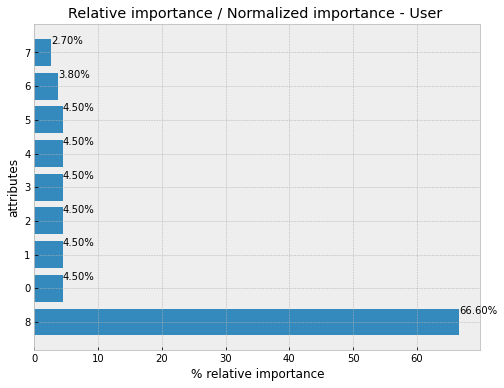

In [68]:
        #Ploting the normalized importances
alt_data = pd.DataFrame(
list(relative_importance_per_feature.items()), 
columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)

  
    
f, ax = plt.subplots(figsize=(8, 6))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance - User ' )
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

# Avaliando toda a base de imoveis para a priorização

Abaixo tem de ser feitoacada rodada de N_top_Rank

In [69]:
Imoveis_like_predict =res.predict(Features_dummies).sort_values(ascending=False)

In [70]:
Imoveis_like_predict =pd.DataFrame(Imoveis_like_predict, columns=['Odd'] )
Imoveis_like_predict.head()

,Odd
50078,0.954
71414,0.954
67343,0.954
26552,0.954
64923,0.954


In [104]:
#colocando os x elementos que são osmelhores avaliadospela funcao de preferencia
N_cards =[]
i=0

while i< composição_sugestao[1]:   
    if(Imoveis_like_predict.index.values[i] not in Imoveis_avaliados):
        N_cards.append(Imoveis_like_predict.index.values[i])
        i=i+1
N_cards


[50078,
 71414,
 67343,
 26552,
 64923,
 29431,
 26171,
 26217,
 31446,
 66876,
 53223,
 21869,
 91956,
 8085]

In [105]:
#Colocando o restante de elementos que sao 100% aderentes com a busca dousuario,mas que temosmaiores scores
Imoveis_filtrados=[]

for imov in range(0,N_imoveis):
    lista = ((x.loc[imov, :]>=preferencias_min.loc[0,:]) & (x.loc[imov, :] <= preferencias_max.loc[0,:]))
    check= all([x == True for x in lista])
       
    if (check == True) and (x.index.values[imov] not in Imoveis_avaliados)and (x.index.values[imov] not in N_cards):
       Imoveis_filtrados.append(imov)
        
Imoveis_filtrados

###############and (imov not in Imoveis_filtrados[user])
#######verificar seja nao foram avaliados

[1022,
 1093,
 1169,
 2551,
 2605,
 2606,
 3337,
 4362,
 5089,
 5643,
 5742,
 9367,
 12107,
 12274,
 12291,
 12839,
 12929,
 13836,
 15850,
 15988,
 20618,
 21384,
 21964,
 22367,
 22664,
 22716,
 22788,
 22903,
 23067,
 25768,
 28252,
 28387,
 28522,
 28580,
 28750,
 29051,
 29059,
 29595,
 32840,
 33251,
 33595,
 35503,
 35527,
 36795,
 37209,
 37210,
 37304,
 37348,
 37439,
 37580,
 38125,
 38659,
 39077,
 39255,
 39319,
 39465,
 39576,
 39612,
 39812,
 40045,
 40071,
 40279,
 40570,
 40638,
 40663,
 42883,
 49058,
 49304,
 49771,
 49839,
 49895,
 50240,
 50455,
 50607,
 50776,
 51195,
 51513,
 51540,
 51964,
 52732,
 52995,
 53426,
 54411,
 55618,
 56089,
 56162,
 56230,
 59988,
 61834,
 62631,
 62683,
 65112,
 65136,
 65162,
 65798,
 65799,
 65961,
 66002,
 66071,
 66175,
 66334,
 66399,
 66411,
 66431,
 66474,
 66612,
 66617,
 66649,
 66650,
 66661,
 66676,
 66683,
 66757,
 66769,
 66854,
 66906,
 67018,
 67089,
 67206,
 67275,
 67296,
 67332,
 67429,
 67629,
 67775,
 67860,
 678

In [106]:
#agora vamos reordenar esta lista conforme os scores
#defindo os scores atuaias dosimoveis
score =[]
for ind in range(0,len(Imoveis_filtrados)):
    index = Imoveis_filtrados[ind]
    value = imoveis_relevancia['Relevancia'].values[index]
    score.append(value)
score

[79,
 94,
 36,
 36,
 51,
 48,
 19,
 66,
 44,
 47,
 70,
 45,
 69,
 7,
 94,
 76,
 1,
 53,
 61,
 59,
 75,
 81,
 48,
 79,
 12,
 68,
 24,
 6,
 55,
 77,
 55,
 95,
 29,
 63,
 18,
 69,
 47,
 35,
 49,
 47,
 77,
 66,
 9,
 26,
 16,
 67,
 66,
 29,
 81,
 91,
 19,
 51,
 54,
 74,
 58,
 23,
 20,
 41,
 90,
 14,
 9,
 58,
 63,
 72,
 44,
 36,
 31,
 62,
 99,
 11,
 27,
 50,
 3,
 17,
 44,
 3,
 33,
 15,
 69,
 91,
 61,
 64,
 27,
 57,
 47,
 62,
 87,
 96,
 11,
 91,
 15,
 33,
 57,
 62,
 80,
 60,
 61,
 95,
 94,
 68,
 1,
 48,
 26,
 68,
 85,
 86,
 18,
 21,
 92,
 80,
 12,
 5,
 29,
 63,
 27,
 23,
 33,
 0,
 31,
 22,
 86,
 11,
 67,
 11,
 41,
 61,
 29,
 31,
 92,
 62,
 53,
 85,
 85,
 60,
 9,
 91,
 3,
 88,
 24,
 11,
 96,
 74,
 9,
 14,
 30,
 22,
 34,
 57,
 16,
 85,
 27,
 70,
 20,
 85,
 40,
 1,
 13,
 58,
 11,
 68,
 25,
 71,
 8,
 54,
 50,
 15,
 28,
 98,
 50,
 55,
 23,
 72,
 96,
 73,
 5,
 38,
 12,
 0,
 93,
 66,
 69,
 14,
 3,
 16,
 16,
 31,
 86,
 49,
 74,
 75,
 24,
 18,
 28,
 29,
 28,
 65,
 10,
 58,
 51,
 64,
 28,
 72,
 56]

In [107]:
#Reordenando os imoveis por ordem decrescente de score
rank_sugestao= [index for element, index in sorted(zip(score, range(len(score))),reverse=True)]
Imoveis_filtrados = [Imoveis_filtrados[i] for i in rank_sugestao]

print(Imoveis_filtrados) 

[49771, 79384, 83686, 72534, 59988, 66002, 28387, 66071, 12291, 1093, 87358, 68084, 66650, 71932, 62631, 52732, 37580, 39812, 72096, 56230, 91615, 67296, 66612, 75663, 74328, 71206, 70847, 66474, 37439, 21384, 66661, 65798, 22367, 1022, 33595, 25768, 12839, 91820, 20618, 91807, 72608, 39255, 83958, 93753, 81285, 40638, 76126, 74948, 5742, 88159, 51964, 29051, 12107, 76104, 66431, 66175, 22716, 67429, 37210, 87413, 37304, 35503, 4362, 92988, 93117, 53426, 66769, 40570, 28580, 69413, 65162, 56162, 49304, 67860, 65961, 52995, 15850, 71595, 65799, 15988, 93111, 75944, 40279, 39319, 73772, 65136, 55618, 93757, 80568, 28252, 23067, 77121, 39077, 69416, 13836, 93115, 38659, 2605, 79522, 77572, 50240, 91791, 32840, 66399, 21964, 2606, 56089, 33251, 29059, 5643, 9367, 50776, 40663, 5089, 67775, 39612, 75812, 85501, 42883, 2551, 1169, 29595, 73132, 67018, 65112, 51513, 91428, 67957, 67206, 49058, 72969, 92553, 67896, 66757, 37348, 28522, 93426, 92939, 92517, 79360, 74906, 66854, 54411, 49895, 66

In [108]:
#adicionandoos topscores no N_cards
i=0
while i< composição_sugestao[0]:   
    N_cards.append(Imoveis_filtrados[i])
    i=i+1
N_cards

[50078,
 71414,
 67343,
 26552,
 64923,
 29431,
 26171,
 26217,
 31446,
 66876,
 53223,
 21869,
 91956,
 8085,
 49771,
 79384,
 83686,
 72534,
 59988,
 66002]

In [109]:
len(N_cards)

20

In [110]:
#embaralhandoos dados
random.shuffle(N_cards)
N_cards

[50078,
 79384,
 66002,
 29431,
 8085,
 26171,
 59988,
 26217,
 26552,
 67343,
 72534,
 49771,
 83686,
 31446,
 66876,
 21869,
 71414,
 64923,
 91956,
 53223]

In [115]:
#buscando os features de cada elementoem N_card
x_pref = x.iloc[N_cards,:]
x_pref

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
50078,0,1,1,1,2,2,1,1,5
79384,0,1,2,1,2,2,2,2,0
66002,0,2,1,1,3,2,2,2,0
29431,0,1,1,1,2,3,2,2,5
8085,0,1,2,1,2,3,1,1,5
26171,0,1,2,1,2,3,1,2,5
59988,0,1,2,1,2,2,1,2,0
26217,0,1,2,1,2,3,1,2,5
26552,0,1,1,1,2,3,1,1,5
67343,0,1,1,1,2,3,1,1,5


In [ ]:
# fazendo as avaliações

for i in range(0,N_top_Rank):
    Imoveis_avaliados.append(N_cards[i])
    resposta = int(input('Like do Imovel '+ str(N_cards[i])+': '))
    if resposta ==1:
        Imoveis_like.append(N_cards[i])
    else:
        Imoveis_dislike.append(N_cards[i])
    
    N_cards_like.append(resposta ) #esta é a lista y
    N_cards_x =N_cards_x.append(x_pref.iloc[i,:])


y= pd.DataFrame(N_cards_like,columns=['Likes'])
y.index = N_cards_x.index

y


In [166]:
N_cards_x

,atrib_0,atrib_1,atrib_2,atrib_3,atrib_4,atrib_5,atrib_6,atrib_7,atrib_8
50078,0,1,1,1,2,2,1,1,5
79384,0,1,2,1,2,2,2,2,0
66002,0,2,1,1,3,2,2,2,0
29431,0,1,1,1,2,3,2,2,5
8085,0,1,2,1,2,3,1,1,5
26171,0,1,2,1,2,3,1,2,5
59988,0,1,2,1,2,2,1,2,0
26217,0,1,2,1,2,3,1,2,5
26552,0,1,1,1,2,3,1,1,5
67343,0,1,1,1,2,3,1,1,5


In [167]:
colunas_dummies

Index(['atrib_0_0', 'atrib_0_1', 'atrib_0_2', 'atrib_0_3', 'atrib_0_4',
       'atrib_0_5', 'atrib_0_6', 'atrib_0_7', 'atrib_0_8', 'atrib_1_0',
       'atrib_1_1', 'atrib_1_2', 'atrib_1_3', 'atrib_1_4', 'atrib_1_5',
       'atrib_1_6', 'atrib_1_7', 'atrib_1_8', 'atrib_2_0', 'atrib_2_1',
       'atrib_2_2', 'atrib_2_3', 'atrib_2_4', 'atrib_2_5', 'atrib_2_6',
       'atrib_2_7', 'atrib_2_8', 'atrib_3_0', 'atrib_3_1', 'atrib_3_2',
       'atrib_3_3', 'atrib_3_4', 'atrib_3_5', 'atrib_4_0', 'atrib_4_1',
       'atrib_4_2', 'atrib_4_3', 'atrib_4_4', 'atrib_4_5', 'atrib_4_6',
       'atrib_4_7', 'atrib_4_8', 'atrib_4_9', 'atrib_4_10', 'atrib_5_0',
       'atrib_5_1', 'atrib_5_2', 'atrib_5_3', 'atrib_5_4', 'atrib_5_5',
       'atrib_6_0', 'atrib_6_1', 'atrib_6_2', 'atrib_6_3', 'atrib_6_4',
       'atrib_6_5', 'atrib_6_6', 'atrib_6_7', 'atrib_6_8', 'atrib_7_0',
       'atrib_7_1', 'atrib_7_2', 'atrib_7_3', 'atrib_7_4', 'atrib_7_5',
       'atrib_7_6', 'atrib_7_7', 'atrib_7_8', 'atrib_8_0', 'atr

In [168]:
xdum.columns

Index(['atrib_0_0', 'atrib_1_1', 'atrib_1_2', 'atrib_2_1', 'atrib_2_2',
       'atrib_3_1', 'atrib_4_2', 'atrib_4_3', 'atrib_5_2', 'atrib_5_3',
       'atrib_6_1', 'atrib_6_2', 'atrib_7_1', 'atrib_7_2', 'atrib_8_0',
       'atrib_8_2', 'atrib_8_5'],
      dtype='object')

(20, 1)
(20, 77)


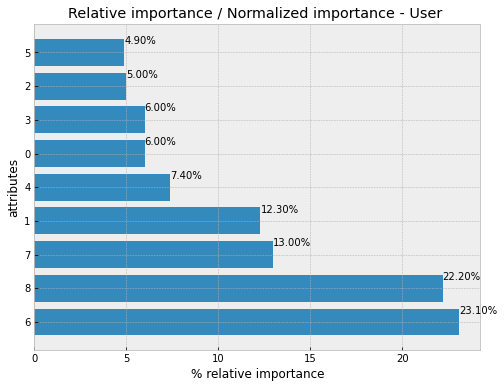

In [170]:
#x_pref=pd.DataFrame(N_cards,columns=columns)

xdum = pd.get_dummies(N_cards_x, columns=[c for c in x.columns ])

#####precisamos harmonizar xdum para podermos avaliar imoveis fora do conjunto N_cards#################### 
d = pd.DataFrame(0, index=range(len(N_cards)), columns=colunas_dummies)
d.index = N_cards_x.index


for i in colunas_dummies:

    if(i in xdum.columns):
        d[i]=xdum[i]

print(y.shape)
print(d.shape)
res = sm.OLS(y, d.astype(float), family=sm.families.Binomial()).fit()

# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[1]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

importance_per_feature = {
    k: np.max(v) - np.min(v) for k, v in range_per_feature.items()
}

        # compute relative importance per feature
        # or normalized feature importance by dividing 
        # sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}
    #Salavando as importanciasnumalista
relative_importances= pd.DataFrame(
list(relative_importance_per_feature.items()), 
columns=['attr', 'relative_importance (pct)']
)
        #Ploting the normalized importances
alt_data = pd.DataFrame(
list(relative_importance_per_feature.items()), 
columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)

  
    
f, ax = plt.subplots(figsize=(8, 6))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance - User ' )
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()




Proximo ciclo:voltar ao bucket doiniciodeste capitulo

# pontospara correção

Interpolaçãolinear de coefs...